# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [2]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

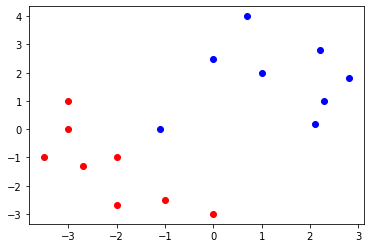

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


In [5]:
# Write your code here
def svm_hard(data, label, k=1):
    weight = cp.Variable(data. shape[1])
    bias = cp.Variable()
    minimize =cp.Minimize(1 / 2 * cp.square(cp.norm(weight)))
    condn = [cp.multiply(label, data@ weight+bias )-k>=0]
    problem = cp.Problem(minimize, condn)
    problem.solve()
    return weight.value, bias.value

(16, 2) (16,)


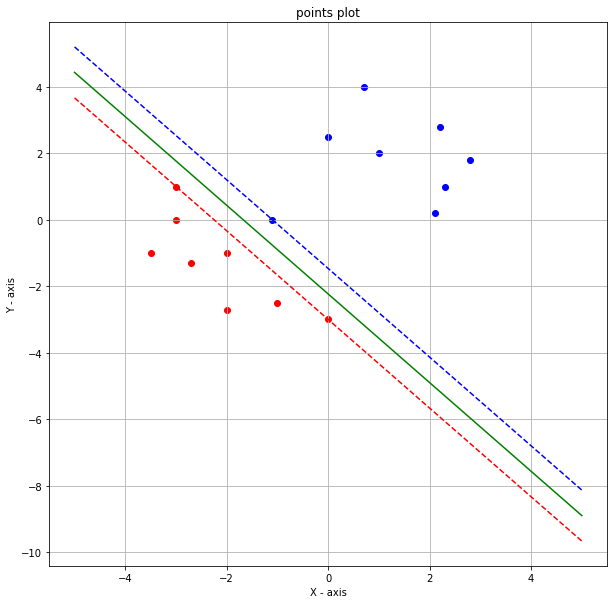

In [6]:
def plotSVM(X, y, weight, bias, k=1):
    print(X.shape , y.shape)
    plt.figure(figsize=(10,10))
    plot_points(X, y)
    line1 = np.linspace(-5, 5, 200)
    line2 = -(weight[0]*line1 + bias) / weight[1]
    plt.plot(line1, line2, 'g-')
    line3 = -(weight[0]*line1 + bias+k) / weight[1]
    plt.plot(line1, line3, 'b--')
    line4 = -(weight[0]*line1 + bias-k) / weight[1]
    plt.plot(line1, line4, 'r--')
    plt.xlabel('X - axis')
    plt.ylabel('Y - axis')
    plt.title("points plot", loc='center')
    plt.grid()
    plt.show()
w,b = svm_hard(X,y)
plotSVM(X,y , w, b)

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [7]:
# Write your code here


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [8]:
# Re-create the Synthetic Data by adding the points and visualize the points
new_point_x_1 = np.array([-4, -10])
new_point_x_2 = np.array([4, 4])
new_point_y_1 = np.array([1])
new_point_y_2 = np.array([-1])

# Append new point to X
X = np.append(X, [new_point_x_1], axis=0)
X = np.append(X, [new_point_x_2], axis=0)
print(X)
y = np.append(y, new_point_y_1, axis=0)
y = np.append(y, new_point_y_2, axis=0)
print(y)

[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]


(18, 2) (18,)


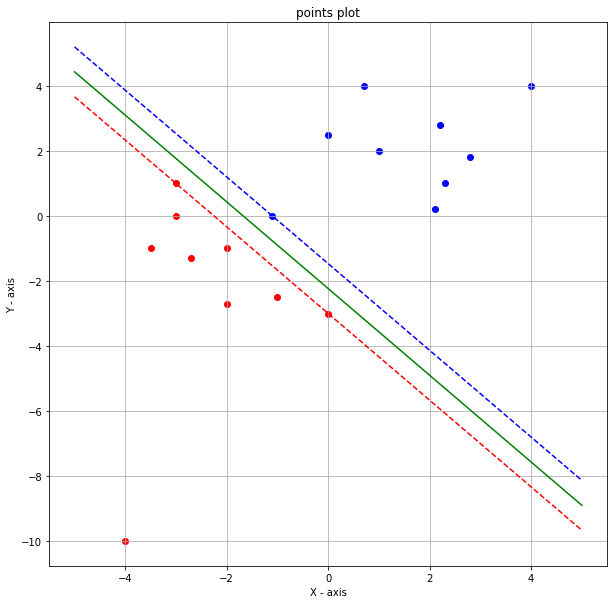

In [9]:
# Solve for the decision boundary using this modified dataset
w,b = svm_hard(X,y)
plotSVM(X, y, w, b)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [10]:
class SVM_soft:

    def __init__(self):
        self.weight = None
        self.bias = None
        self.optimize = []

    def fit(self, data, label, c_value):
        self.weight = cp.Variable(X.shape[1])
        self.bias = cp.Variable()
        slack_var = cp.Variable(len(data))
        minimize = cp.Minimize(1 / 2 * cp.sum_squares(self.weight) + (c_value * cp.sum(slack_var)))
        
        for i in range(data.shape[0]):
            self.optimize.append(y[i] * (data[i] @ self.weight + self.bias) >= 1 - slack_var[i])
            self.optimize.append(slack_var[i] >= 0)
        prob = cp.Problem(minimize, self.optimize)
        prob.solve()
        return self.weight.value, self.bias.value

    # def predict(self, X):
    #     sig = np.dot(X, self.weight) - self.bias
    #     return np.sign(sig)


(18, 2) (18,)


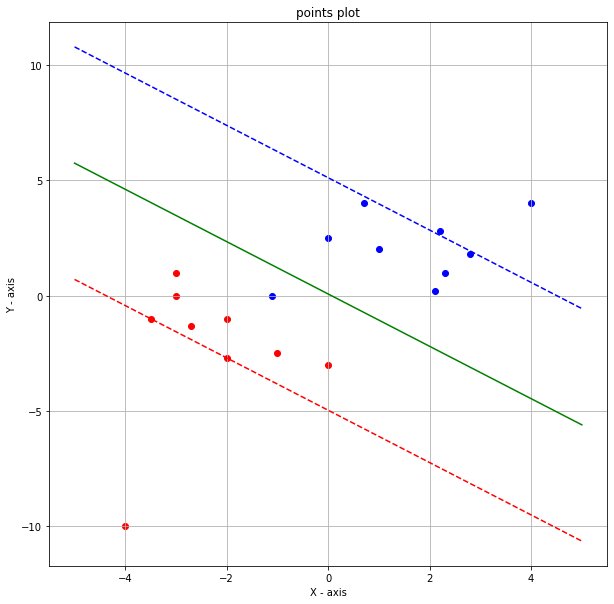

In [11]:
# Write your code here for C= 0.01
obj = SVM_soft()
w, b = obj.fit(X, y, 0.01)
plotSVM(X, y, w, b)

(18, 2) (18,)


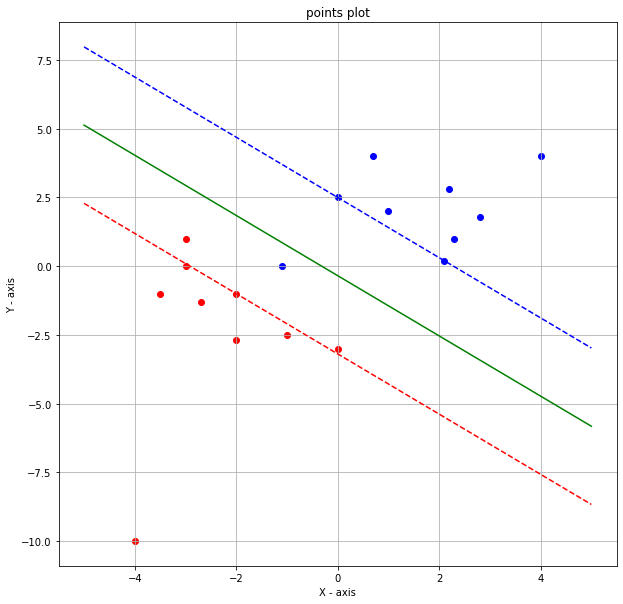

In [12]:
# Write your code here for C= 0.1
obj = SVM_soft()
w, b = obj.fit(X, y, 0.1)
plotSVM(X, y, w, b)

(18, 2) (18,)


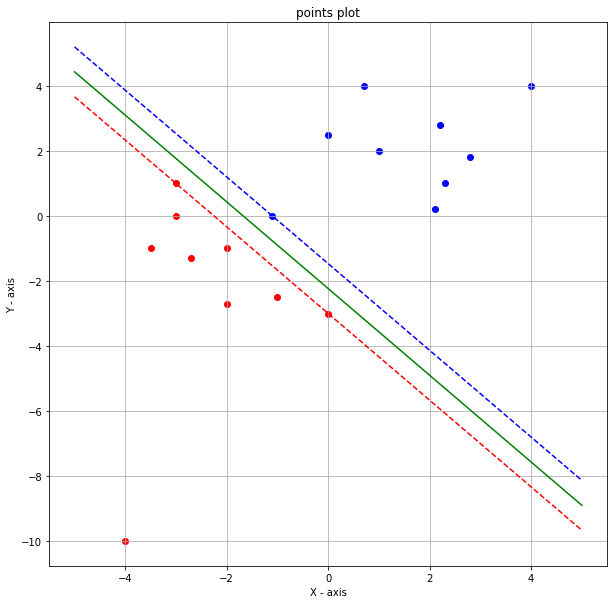

In [13]:
# Write your code here for C= 3
obj = SVM_soft()
w, b = obj.fit(X, y, 3)
plotSVM(X, y, w, b)

(18, 2) (18,)


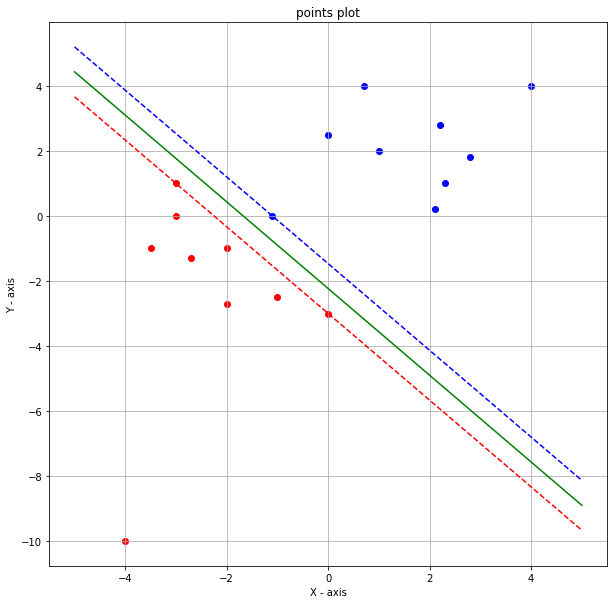

In [14]:
# Write your code here for C= 10
obj = SVM_soft()
w, b = obj.fit(X, y, 10)
plotSVM(X, y, w, b)

(18, 2) (18,)


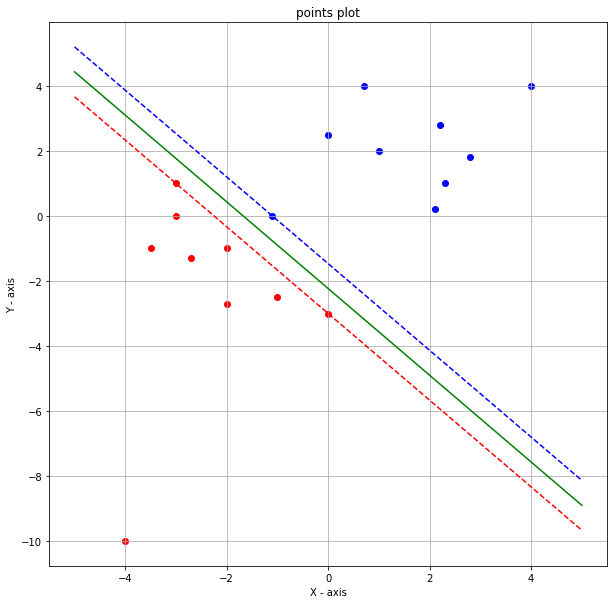

In [15]:
# Write your code here for C= 100
obj = SVM_soft()
w, b = obj.fit(X, y, 10)
plotSVM(X, y, w, b)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [16]:
# Write your Code here
X = np.delete(X, 2, axis=0)
X = np.delete(X, 7, axis=0)
X = np.delete(X, 8, axis=0)
y = np.delete(y, 2, axis=0)
y = np.delete(y, 7, axis=0)
y = np.delete(y, 8, axis=0)

(15, 2) (15,)


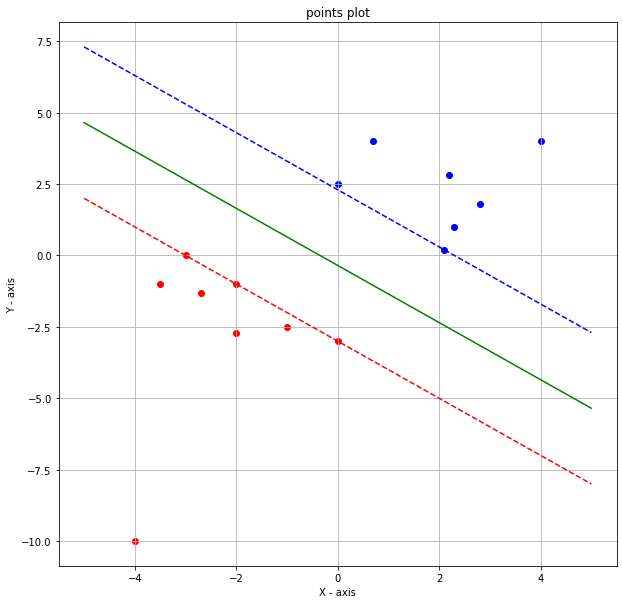

In [17]:
obj = SVM_soft()
w, b = obj.fit(X, y, 10)
plotSVM(X, y, w, b)

### Subsection 2

In [18]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-28 07:43:02--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.04s   

2023-03-28 07:43:02 (268 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-28 07:43:02--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [19]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [20]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [21]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [22]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaler = scaler.fit_transform(X)
yscaler = scaler.fit_transform(y.reshape(-1, 1))
print(Xscaler)
print(yscaler)

[[-1.3079457  -0.19138727]
 [-1.10526816  0.10155243]
 [-0.98366164 -0.27926918]
 [-0.69991309 -0.19138727]
 [-0.69991309 -0.68938475]
 [-0.29455802 -0.63079681]
 [ 0.11079705 -0.77726666]
 [ 0.11079705  0.83390167]
 [ 0.3945456   1.27331122]
 [ 0.9620427   0.16014037]
 [ 1.04311372  0.39449213]
 [ 1.24579126  0.62884388]
 [ 1.00257821  0.92178358]
 [-1.51062324 -2.82784454]
 [ 1.73221734  1.27331122]]
[[ 0.93541435]
 [ 0.93541435]
 [ 0.93541435]
 [ 0.93541435]
 [ 0.93541435]
 [ 0.93541435]
 [ 0.93541435]
 [-1.06904497]
 [-1.06904497]
 [-1.06904497]
 [-1.06904497]
 [-1.06904497]
 [-1.06904497]
 [ 0.93541435]
 [-1.06904497]]


In [25]:
np.array(yscaler)

array([[ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497]])

A small gamma value results in a wide Gaussian kernel and a smoother decision boundary, while a large gamma value results in a narrow Gaussian kernel and a more complex decision boundary that fits the training data more closely. The range of gamma values depends on the specific dataset and problem being addressed. In general, gamma values are positive and typically range from 0.0001 to 10 or higher. 

<br>




In [39]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score, classification_report

# classifier = make_pipeline(StandardScaler(), SVC(C = 1, gamma=0.80))
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


classifier = SVC(gamma = 100, C=10, kernel = "linear")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

0.9336666666666666
[0.9750416  0.97274032 0.94006309 0.91428571 0.92869565 0.92022263
 0.94938918 0.90753425 0.9296741  0.89296636]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.97      0.98      0.97       346
           2       0.93      0.96      0.94       312
           3       0.91      0.92      0.91       279
           4       0.91      0.95      0.93       281
           5       0.91      0.94      0.92       265
           6       0.96      0.94      0.95       290
           7       0.94      0.87      0.91       303
           8       0.96      0.90      0.93       301
           9       0.89      0.90      0.89       326

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  

In [40]:
lst = ["linear", "poly", "rbf", "sigmoid"]
import numpy as np
for gamma in np.arange(0, 5, 1):
    for c_val in np.arange(1, 5, 1):
        for kernel in lst:

            classifier = SVC(gamma=gamma, C=c_val, kernel=kernel)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            print(f"Gamma : {gamma}, C : {c_val}, kernel : {kernel}")
            print(accuracy_score(y_test, y_pred))
            print(f1_score(y_test, y_pred, average=None))
            print(classification_report(y_test, y_pred))
            print("="*50)

Gamma : 0, C : 1, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 0, C : 1, kernel : poly
0.11533333333333333
[0.         0.20681411 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 1, kernel : rbf
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 1, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 2, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 0, C : 2, kernel : poly
0.11533333333333333
[0.         0.20681411 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 2, kernel : rbf
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 2, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 3, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 0, C : 3, kernel : poly
0.11533333333333333
[0.         0.20681411 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 3, kernel : rbf
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 3, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 4, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 0, C : 4, kernel : poly
0.11533333333333333
[0.         0.20681411 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 4, kernel : rbf
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 0, C : 4, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 1, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 1, C : 1, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 1, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 2, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 1, C : 2, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 2, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 3, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 1, C : 3, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 3, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 4, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 1, C : 4, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 1, C : 4, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 1, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 2, C : 1, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 1, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 2, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 2, C : 2, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 2, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 3, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 2, C : 3, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 3, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 4, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 2, C : 4, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 2, C : 4, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 1, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 3, C : 1, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 1, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 2, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 3, C : 2, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 2, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 3, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 3, C : 3, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 3, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 4, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 3, C : 4, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 3, C : 4, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 1, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 4, C : 1, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 1, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 2, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 4, C : 2, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 2, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 3, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 4, C : 3, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 3, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 4, kernel : linear
0.8893333333333333
[0.94892916 0.95898161 0.89375    0.84191829 0.87719298 0.84171322
 0.92362345 0.8779661  0.85964912 0.85145482]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gamma : 4, C : 4, kernel : poly
0.924
[0.95826377 0.93922652 0.93870968 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gamma : 4, C : 4, kernel : sigmoid
0.11533333333333333
[0.         0.20681411 0.         0.         0.         0.
 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       326

    accuracy                           0.12      3000
   macro avg       0.01      0.10      0.02      3000
weighted avg       0.01      0.12      0.02      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
